# Continuous Dice (cDC)   VS   Dice Coefficient (DSC)

Continuous Dice = variant of the Dice coefficient for evaluate probabilistic segmentations

https://arxiv.org/ftp/arxiv/papers/1906/1906.11031.pdf

implementation in python: https://github.com/rubyshamir/cDC/blob/main/continuous_Dice_coefficient.py 

### keep in mind: GT = should be binary!

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import nibabel as nib
import seaborn as sns

In [2]:
# cDc from   https://github.com/rubyshamir/cDC/blob/main/continuous_Dice_coefficient.py
def cdc(A_binary, B_probability_map):

    AB = A_binary * B_probability_map
    c = np.sum(AB)/max(np.size(AB[AB>0]), 1)
    cDC = 2*(np.sum(AB))/(c*np.sum(A_binary) + np.sum(B_probability_map))

    return cDC

def dice(A_binary, B_binary):

    AB = A_binary * B_binary
    DC = 2*(np.sum(AB))/(np.sum(A_binary) + np.sum(B_binary))

    return DC

## Exp #1: in one slice (GM / SC from template)

size original :  (80, 80)


Text(0.5, 0, 'image_GM')

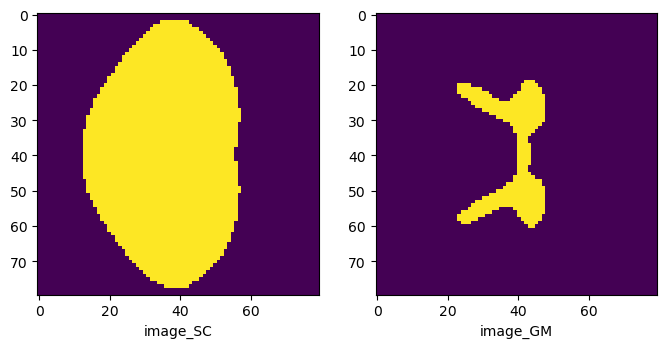

In [3]:
path_database = ""
slic=114
image_data_SC = nib.load(path_database  + 'AMU7T_sc_bin.nii.gz')
header_info_SC = image_data_SC.header
image_SC = np.array(image_data_SC.get_fdata())
image_SC=image_SC[15:95,5:85,slic]
image_data_GM = nib.load(path_database  + 'AMU7T_gm_bin.nii.gz')
header_info_GM = image_data_GM.header
image_GM = np.array(image_data_GM.get_fdata())
image_GM=image_GM[15:95,5:85,slic]
print("size original : ",image_GM.shape)
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(image_SC)
plt.xlabel("image_SC")
plt.subplot(122)
plt.imshow(image_GM)
plt.xlabel("image_GM")

resize :  24 x 24


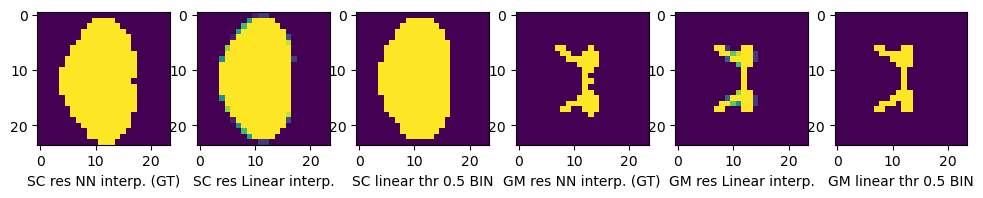

resize :  31 x 31


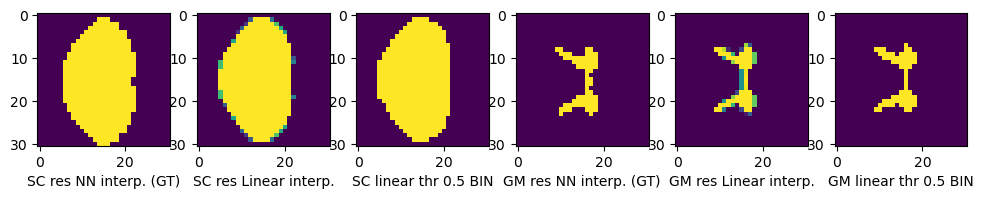

resize :  38 x 38


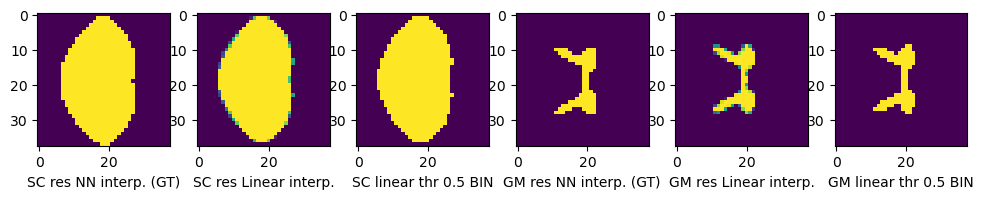

resize :  45 x 45


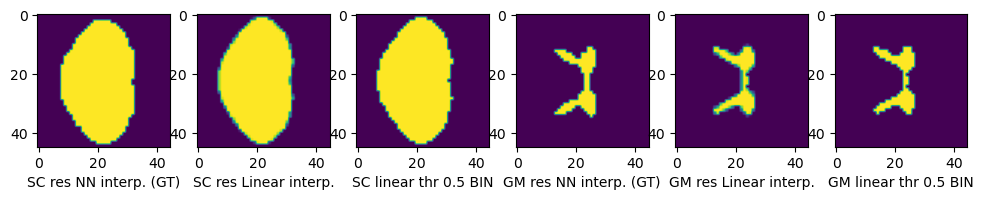

resize :  52 x 52


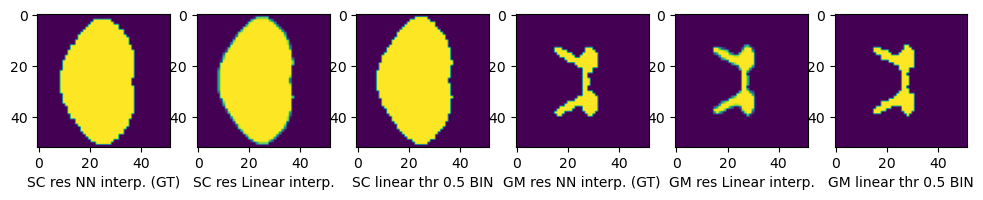

resize :  59 x 59


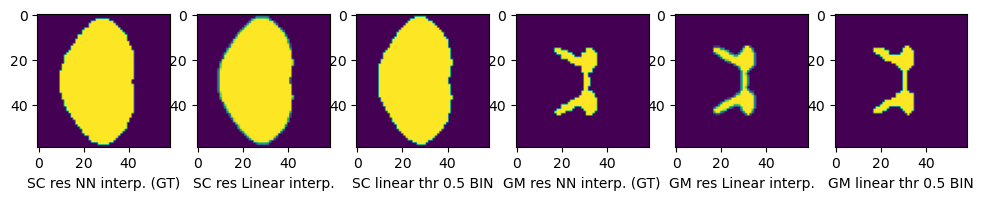

resize :  66 x 66


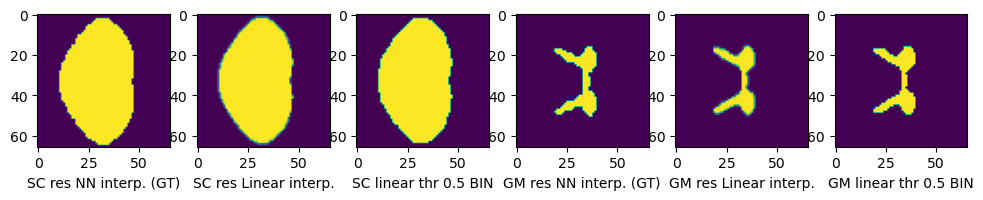

resize :  73 x 73


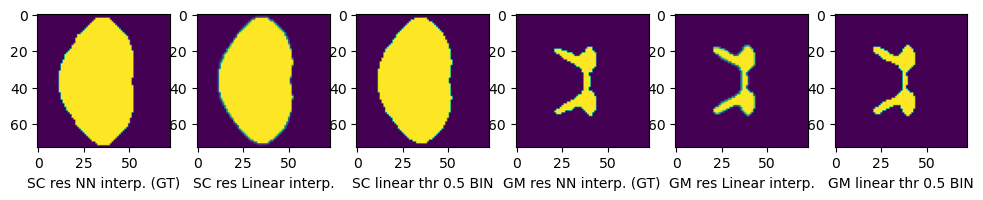

resize :  80 x 80


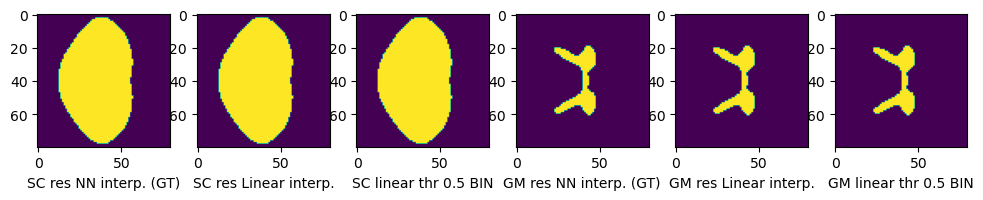

resize :  87 x 87


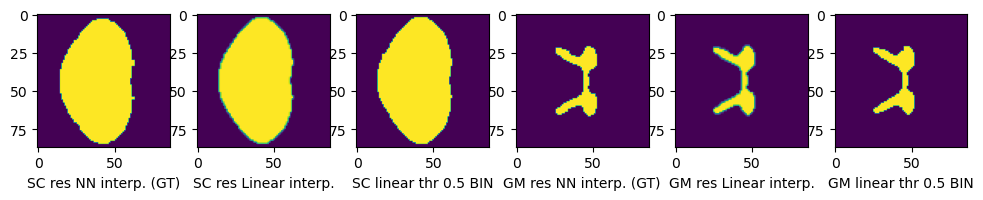

resize :  94 x 94


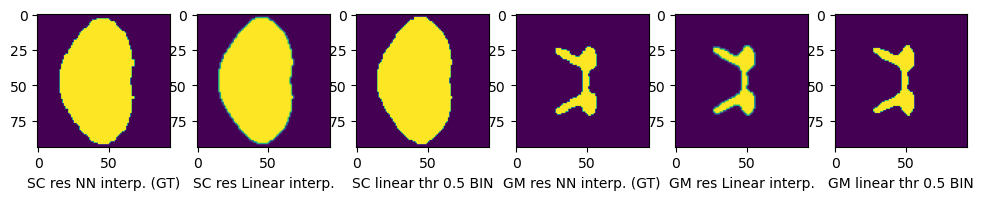

In [4]:
df=[]
for size in range (24,100,7):
    image_SC_res_linear = cv2.resize(image_SC, (size, size), interpolation = cv2.INTER_LINEAR)
    image_GM_res_linear = cv2.resize(image_GM, (size, size), interpolation = cv2.INTER_LINEAR)
    image_SC_res_NN = cv2.resize(image_SC, (size, size), interpolation = cv2.INTER_NEAREST ) # GT
    image_GM_res_NN = cv2.resize(image_GM, (size, size), interpolation = cv2.INTER_NEAREST ) # GT
    #image_SC_res_linear = cv2.GaussianBlur(image_SC_res_linear,(5,5),cv2.BORDER_DEFAULT)
    #image_GM_res_linear = cv2.GaussianBlur(image_GM_res_linear,(5,5),cv2.BORDER_DEFAULT)
    ret,sc_bin = cv2.threshold(image_SC_res_linear,0.5,1,cv2.THRESH_BINARY)
    ret,gm_bin = cv2.threshold(image_GM_res_linear,0.5,1,cv2.THRESH_BINARY)
    print("resize : ",size ,"x", size)
    
    plt.figure(figsize=(12,8))
    plt.subplot(161)
    plt.imshow(image_SC_res_NN)
    plt.xlabel("SC res NN interp. (GT)")
    plt.subplot(162)
    plt.imshow(image_SC_res_linear)
    plt.xlabel("SC res Linear interp.")
    plt.subplot(163)
    plt.imshow(sc_bin)
    plt.xlabel("SC linear thr 0.5 BIN")
    plt.subplot(164)
    plt.imshow(image_GM_res_NN)
    plt.xlabel("GM res NN interp. (GT)")
    plt.subplot(165)
    plt.imshow(image_GM_res_linear)
    plt.xlabel("GM res Linear interp.")
    plt.subplot(166)
    plt.imshow(gm_bin)
    plt.xlabel("GM linear thr 0.5 BIN")
    plt.show()
    
    dice_sc=(dice( image_SC_res_NN , sc_bin))
    dice_gm=(dice( image_GM_res_NN , gm_bin))
    c_dice_sc =(cdc( image_SC_res_NN , image_SC_res_linear ))
    c_dice_gm =(cdc( image_GM_res_NN , image_GM_res_linear ))
    d = {'factor':size ,'slice':slic,'dice_sc':dice_sc,'dice_gm':dice_gm,'c_dice_sc':c_dice_sc,'c_dice_gm':c_dice_gm}
    df.append(d)
    data=pd.DataFrame(data=df)
    data

In [5]:
data

,factor,slice,dice_sc,dice_gm,c_dice_sc,c_dice_gm
0,24,114,0.940426,0.759494,0.950541,0.836370
1,31,114,0.948320,0.839695,0.955596,0.843646
2,38,114,0.962393,0.887805,0.964330,0.903229
3,45,114,0.966402,0.893773,0.971551,0.902380
4,52,114,0.965769,0.875000,0.974977,0.922276
5,59,114,0.973740,0.873118,0.978639,0.926498
6,66,114,0.977260,0.913907,0.982117,0.944812
7,73,114,0.978140,0.915862,0.986161,0.942975
8,80,114,1.000000,1.000000,1.000000,1.000000
9,87,114,0.984413,0.909615,0.988602,0.950095


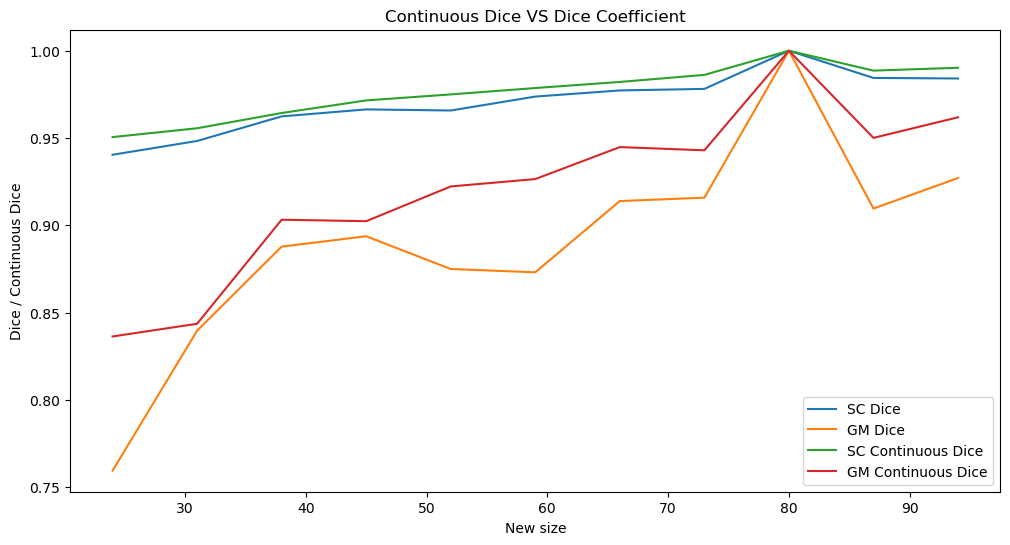

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data['factor'], data['dice_sc'], label='SC Dice')
ax.plot(data['factor'], data['dice_gm'], label='GM Dice')
ax.plot(data['factor'], data['c_dice_sc'], label='SC Continuous Dice')
ax.plot(data['factor'], data['c_dice_gm'], label='GM Continuous Dice')
ax.set_xlabel('New size')
ax.set_ylabel('Dice / Continuous Dice')
ax.set_title('Continuous Dice VS Dice Coefficient')
ax.legend()
plt.show()

## Exp #2: in 223 slices

In [7]:
df=[]
path_database = ""
image_data_SC = nib.load(path_database  + 'AMU7T_sc_bin.nii.gz')
header_info_SC = image_data_SC.header
image_SC = np.array(image_data_SC.get_fdata())
image_data_GM = nib.load(path_database  + 'AMU7T_gm_bin.nii.gz')
header_info_GM = image_data_GM.header
image_GM = np.array(image_data_GM.get_fdata())
print ('total of images : ',image_SC.shape[2])
for slic in range ((image_SC.shape[2])):
    image_SC_array=image_SC[15:95,5:85,slic]
    image_GM_array=image_GM[15:95,5:85,slic]
    
    for size in range (24,110,7):
        image_SC_res_linear = cv2.resize(image_SC_array, (size, size), interpolation = cv2.INTER_LINEAR)
        image_GM_res_linear = cv2.resize(image_GM_array, (size, size), interpolation = cv2.INTER_LINEAR)
        image_SC_res_NN = cv2.resize(image_SC_array, (size, size), interpolation = cv2.INTER_NEAREST )
        image_GM_res_NN = cv2.resize(image_GM_array, (size, size), interpolation = cv2.INTER_NEAREST )
        #image_SC_res_linear = cv2.GaussianBlur(image_SC_res_linear,(5,5),cv2.BORDER_DEFAULT)
        #image_GM_res_linear = cv2.GaussianBlur(image_GM_res_linear,(5,5),cv2.BORDER_DEFAULT)
        ret,sc_bin = cv2.threshold(image_SC_res_linear,0.5,1,cv2.THRESH_BINARY)
        ret,gm_bin = cv2.threshold(image_GM_res_linear,0.5,1,cv2.THRESH_BINARY)
        
        dice_sc=(dice( image_SC_res_NN , sc_bin))
        dice_gm=(dice( image_GM_res_NN , gm_bin))
        c_dice_sc =(cdc( image_SC_res_NN , image_SC_res_linear ))
        c_dice_gm =(cdc( image_GM_res_NN , image_GM_res_linear ))
        d = {'factor':size ,'slice':slic,'dice_sc':dice_sc,'dice_gm':dice_gm,'c_dice_sc':c_dice_sc,'c_dice_gm':c_dice_gm}
        df.append(d)
        data=pd.DataFrame(data=df)
        data

total of images :  223


In [8]:
data

,factor,slice,dice_sc,dice_gm,c_dice_sc,c_dice_gm
0,24,0,0.929936,0.681818,0.930009,0.721026
1,31,0,0.963250,0.683544,0.965325,0.780503
2,38,0,0.961637,0.821429,0.964912,0.839589
3,45,0,0.956602,0.830189,0.971074,0.880731
4,52,0,0.959128,0.814480,0.967831,0.878143
...,...,...,...,...,...,...
2894,80,222,1.000000,1.000000,1.000000,1.000000
2895,87,222,0.982246,0.891929,0.987970,0.936735
2896,94,222,0.983450,0.915215,0.989079,0.949158
2897,101,222,0.983306,0.921687,0.989869,0.950924


[Text(0.5, 0, 'Continuous Dice VS Dice Coefficient'),
 Text(0, 0.5, 'Dice / Continuous Dice')]

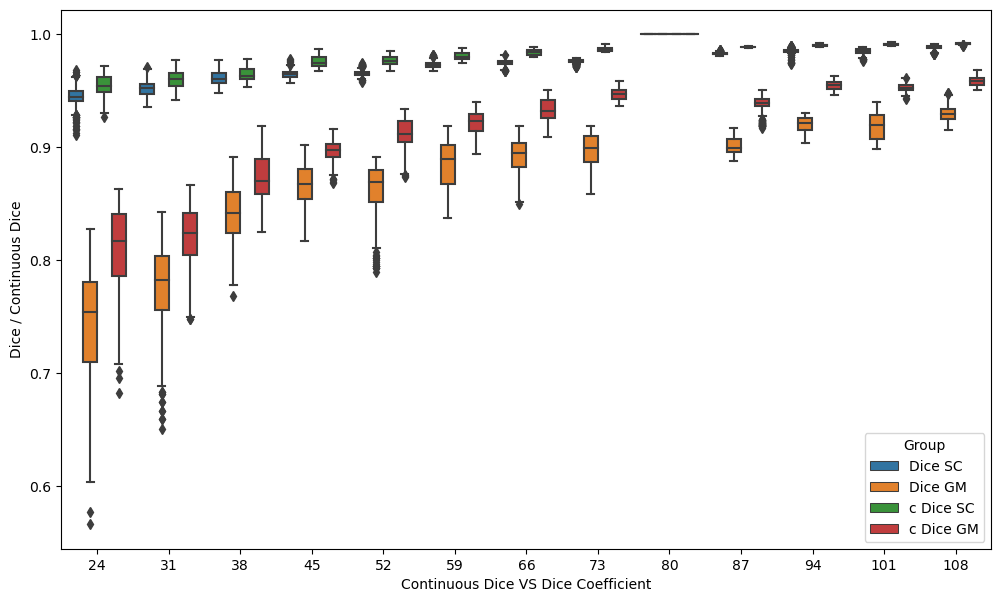

In [9]:
df1=data
dice_sc = df1.filter(['dice_sc','factor'], axis=1)
dice_sc.insert(0, 'Group', 'Dice SC')
dice_sc.rename(columns={'dice_sc': 'CSA'}, inplace=True)

dice_gm = df1.filter(['dice_gm','factor'], axis=1)
dice_gm.insert(0, 'Group', 'Dice GM')
dice_gm.rename(columns={'dice_gm': 'CSA'}, inplace=True)

c_dice_sc = df1.filter(['c_dice_sc','factor'], axis=1)
c_dice_sc.insert(0, 'Group', 'c Dice SC')
c_dice_sc.rename(columns={'c_dice_sc': 'CSA'}, inplace=True)

c_dice_gm = df1.filter(['c_dice_gm','factor'], axis=1)
c_dice_gm.insert(0, 'Group', 'c Dice GM')
c_dice_gm.rename(columns={'c_dice_gm': 'CSA'}, inplace=True)

frames = [dice_sc, dice_gm, c_dice_sc, c_dice_gm]
result_dices = pd.concat(frames, axis=0)

plt.figure(figsize=(12,7))
ax_csa_gm = sns.boxplot(data=result_dices, x="factor", y="CSA", hue="Group")
ax_csa_gm.set(xlabel = 'Continuous Dice VS Dice Coefficient', ylabel = 'Dice / Continuous Dice')

[Text(0.5, 0, 'Continuous Dice VS Dice Coefficient'),
 Text(0, 0.5, 'Dice / Continuous Dice')]

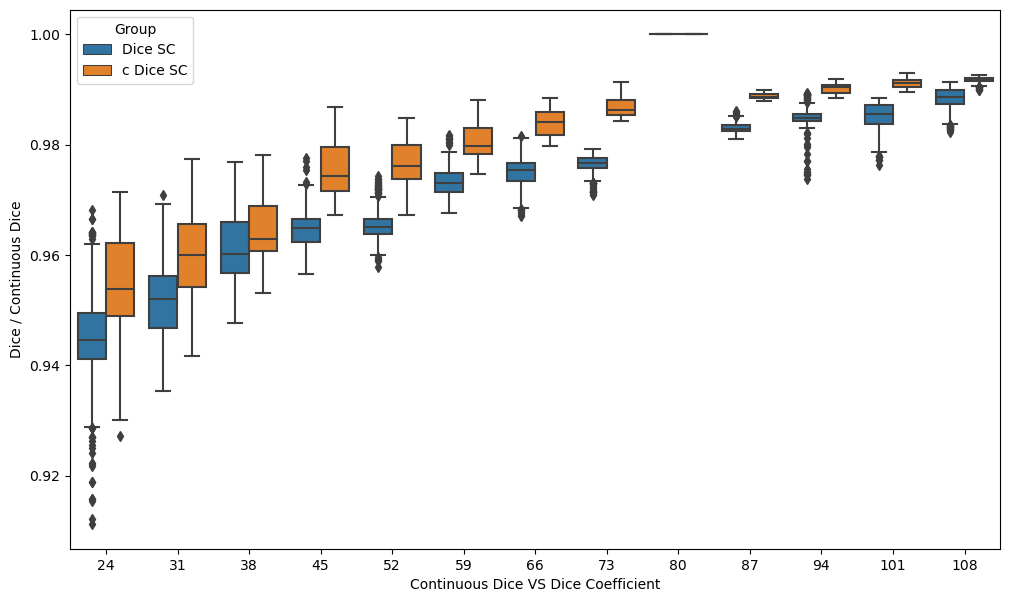

In [10]:
frames = [dice_sc,  c_dice_sc]
result_dices = pd.concat(frames, axis=0)

plt.figure(figsize=(12,7))
ax_csa_gm = sns.boxplot(data=result_dices, x="factor", y="CSA", hue="Group")
ax_csa_gm.set(xlabel = 'Continuous Dice VS Dice Coefficient', ylabel = 'Dice / Continuous Dice')

### Continuous Dice Coefficient: a Method for Evaluating Probabilistic Segmentations

The cDC is well defined for probabilistic segmentation, less biased to the structure’s size and more robust to partial volume effects in comparison to DC.

The method opens the door for the development of better segmentation methods.


Q: How to measure segmentation quality if the GT is a soft mask?
A: 